In [2]:
#Import the packages to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#Import our data.
albumdf = pd.read_csv('atmosphere_album_data', header=0)
songdf = pd.read_csv('atmosphere_song_lyrics', header=0)

In [4]:
#Remove unwanted columns. Need to address the index column being saved in the csv files.
albumdf.drop(['Unnamed: 0', 'Songs'], axis=1, inplace=True)
songdf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
#Create a length feature for each song, as well as a count of unique words, remove x2 and 2x from the lyrics
from collections import Counter
songdf['SongLyrics'] = songdf['SongLyrics'].apply(lambda words: words.replace('x2', ''))
songdf['SongLyrics'] = songdf['SongLyrics'].apply(lambda words: words.replace('2x', ''))
songdf['WordCount'] = songdf['SongLyrics'].map(len)
songdf['UniqueWords'] = songdf['SongLyrics'].apply(lambda words: len(list(Counter(words.split()).keys())))

In [6]:
from nltk.corpus import stopwords
stopword_set = set(stopwords.words('english'))
#Create the same two columns, but with stopwords removed
songdf['WordCountNS'] = songdf['SongLyrics'].apply(lambda words: len(' '.join([w for w in words.split() if w not in stopword_set])))
songdf['UniqueWordsNS'] = songdf['SongLyrics'].apply(lambda words: len(list(Counter([w for w in words.split() if w not in stopword_set]).keys())))

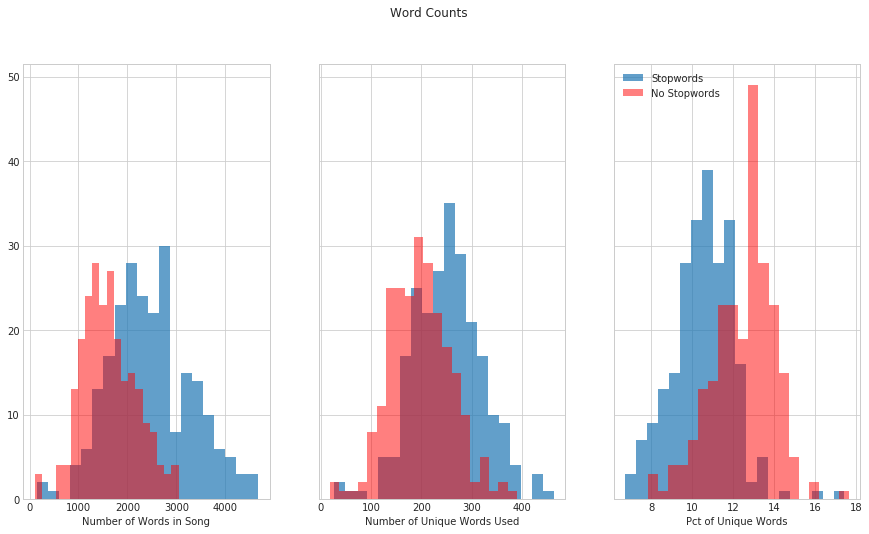

In [7]:
#Plot the new columns and compare them to the columns without stopwords
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(15,8))
songdf['WordCount'].hist(bins=20, alpha=0.7, ax=ax[0])
songdf['UniqueWords'].hist(bins=20, alpha=0.7, ax=ax[1])
ax[2].hist(x=100*(songdf['UniqueWords']/songdf['WordCount']), bins=20, alpha=0.7)
ax[0].set_xlabel('Number of Words in Song')
ax[1].set_xlabel('Number of Unique Words Used')
ax[2].set_xlabel('Pct of Unique Words')
songdf['WordCountNS'].hist(bins=20, color='red', alpha=0.5, ax=ax[0])
songdf['UniqueWordsNS'].hist(bins=20, color='red', alpha=0.5, ax=ax[1])
ax[2].hist(x=100*(songdf['UniqueWordsNS']/songdf['WordCountNS']), color='red', bins=20, alpha=0.5)
plt.suptitle('Word Counts')
plt.legend(('Stopwords', 'No Stopwords'))

So by removing the stopwords we reduce the number of words and number of unique words used, but the percentage
of unique words rises.

In [8]:
#Lets make that percentage of unique words a new feature column
songdf['PctUnique'] = round(100*(songdf['UniqueWordsNS']/songdf['WordCountNS']), 3)

In [9]:
#Now I want to create a new df with information from the albumdf joined based on AlbumID.
joindf = songdf.merge(albumdf, on='AlbumID')
joindf.to_csv('atmospheredf', header=True)
joindf

,SongName,AlbumID,SongResponse,SongURL,SongLyrics,WordCount,UniqueWords,WordCountNS,UniqueWordsNS,PctUnique,AlbumName
0,Like A Fire,43755,200,https://genius.com/Atmosphere-like-a-fire-lyrics,intro a recording its like hi this is a recor...,1887,195,1312,148,11.280,Fishing Blues
1,Ringo,43755,200,https://genius.com/Atmosphere-ringo-lyrics,verse 1 i think im still drunk from last nigh...,2963,228,2186,176,8.051,Fishing Blues
2,Besos,43755,200,https://genius.com/Atmosphere-besos-lyrics,verse 1 slug 1up never still if the sun up it...,2561,271,1793,217,12.103,Fishing Blues
3,Pure Evil,43755,200,https://genius.com/Atmosphere-pure-evil-lyrics,chorus i b e no no no no no oh no no no i don...,1499,153,876,107,12.215,Fishing Blues
4,Perfect,43755,200,https://genius.com/Atmosphere-perfect-lyrics,hook 1 fall from the sky just to learn how to...,2517,242,1628,186,11.425,Fishing Blues
5,Seismic Waves,43755,200,https://genius.com/Atmosphere-seismic-waves-ly...,verse 1 armageddon started i guess it wasnt t...,2476,251,1698,205,12.073,Fishing Blues
6,Next To You,43755,200,https://genius.com/Atmosphere-next-to-you-lyrics,hook dem atlas darlin you dont even know im l...,1973,187,1288,139,10.792,Fishing Blues
7,The Shit That We've Been Through,43755,200,https://genius.com/Atmosphere-the-shit-that-we...,verse 1 slug seven in the morning locked the ...,1884,169,1153,132,11.448,Fishing Blues
8,When The Lights Go Out,43755,200,https://genius.com/Atmosphere-when-the-lights-...,verse 1 slug do you remember that knife you w...,2544,243,1547,188,12.153,Fishing Blues
9,No Biggie,43755,200,https://genius.com/Atmosphere-no-biggie-lyrics,verse slug she said no biggie territorial eno...,1579,177,1037,135,13.018,Fishing Blues


In [10]:
#Check the top 5 in word count and unique words
print(joindf[['SongName', 'AlbumName', 'WordCountNS', 'UniqueWordsNS', 'PctUnique']].sort_values(by='WordCountNS', axis=0, ascending=False).head(5))
print('\n')
print(joindf[['SongName', 'AlbumName', 'WordCountNS', 'UniqueWordsNS', 'PctUnique']].sort_values(by='UniqueWordsNS', axis=0, ascending=False).head(5))
print('\n')
print(joindf[['SongName', 'AlbumName', 'WordCountNS', 'UniqueWordsNS', 'PctUnique']].sort_values(by='PctUnique', axis=0, ascending=False).head(5))

                     SongName         AlbumName  WordCountNS  UniqueWordsNS  \
228                 Crewed Up  Strictly Leakage         3045            390   
104  The Jackpot / Swept Away  Headshots: SE7EN         2985            360   
89                     Adjust         Overcast!         2922            294   
208              Godlovesugly    God Loves Ugly         2921            264   
85          Brief Description         Overcast!         2884            351   

     PctUnique  
228     12.808  
104     12.060  
89      10.062  
208      9.038  
85      12.171  


                      SongName                      AlbumName  WordCountNS  \
228                  Crewed Up               Strictly Leakage         3045   
104   The Jackpot / Swept Away               Headshots: SE7EN         2985   
100  Sep Seven Game Show Theme               Headshots: SE7EN         2850   
85           Brief Description                      Overcast!         2884   
190               Free Or Dead 

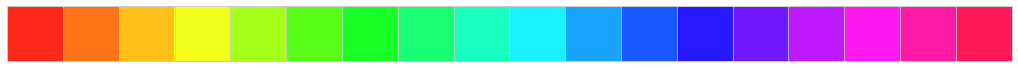

In [11]:
#Going to create a colour palette to separate each album.
album_cplot = sns.hls_palette(joindf['AlbumName'].nunique(), l=0.55, s=1)
album_cdict = dict(zip(joindf['AlbumName'].unique().tolist(), album_cplot))
sns.palplot(album_cplot)

In [12]:
#Now define a function to plot the top 'n' from 'column' in the dataframe.
def topNPlot(column, topn, ax):
    df = joindf.sort_values(by=column, axis=0, ascending=False).head(topn)
    x = df['SongName']
    y = df[column]
    p = sns.barplot(x=x, y=y, data=df, ci=0, hue='AlbumName', palette=album_cdict, dodge=False, ax=ax)
    p.legend_ = None
    plt.tight_layout()

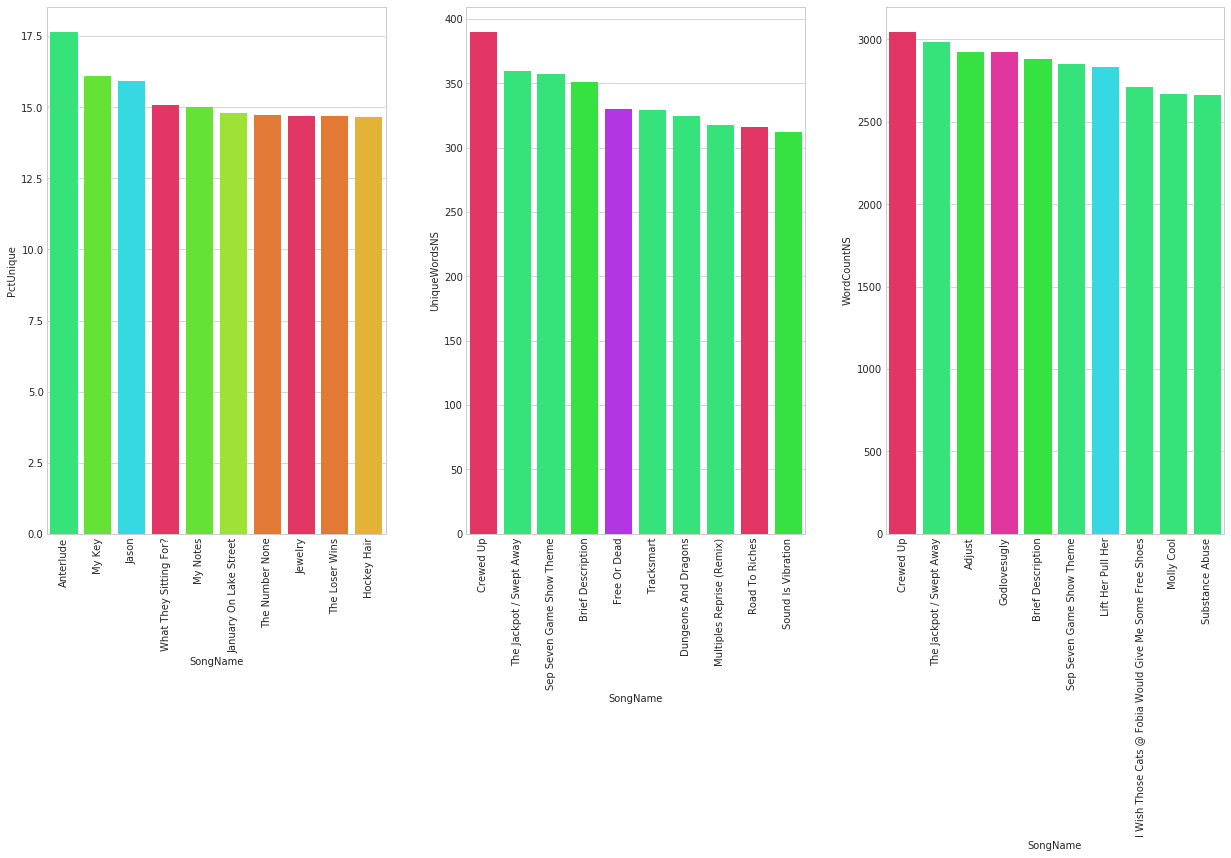

In [13]:
#Lets see if there's overlap between the top 10 in pct of unique, unique words used, and words used.
fig, ax = plt.subplots(ncols=3, figsize=(18,8))
topNPlot('PctUnique', 10, ax[0])
topNPlot('UniqueWordsNS', 10, ax[1])
topNPlot('WordCountNS', 10, ax[2])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

Surprising. There's no overlap between the percentage of unique words used, and the total unique or total words used. There's a lot of overlap betwen total unique and total words though which makes sense.

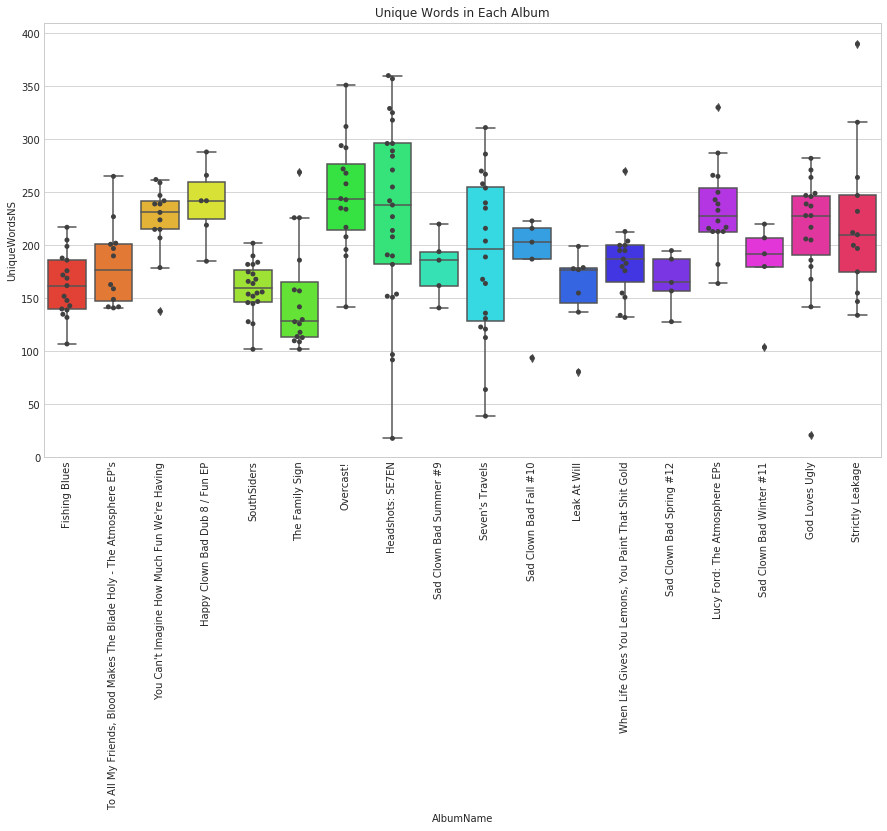

In [15]:
#Lets see how each album compares. We can plot each song in each album, and separate them to see the spread. 
joindf.sort_values(by='UniqueWordsNS', axis=0, ascending=False)
plt.figure(figsize=(15,8))
p = sns.boxplot(x='AlbumName', y='UniqueWordsNS', data=joindf, palette=album_cdict)
p = sns.swarmplot(x='AlbumName', y='UniqueWordsNS', data=joindf, color="0.25")
plt.xticks(rotation=90);
plt.ylim((0,410));
plt.title('Unique Words in Each Album');

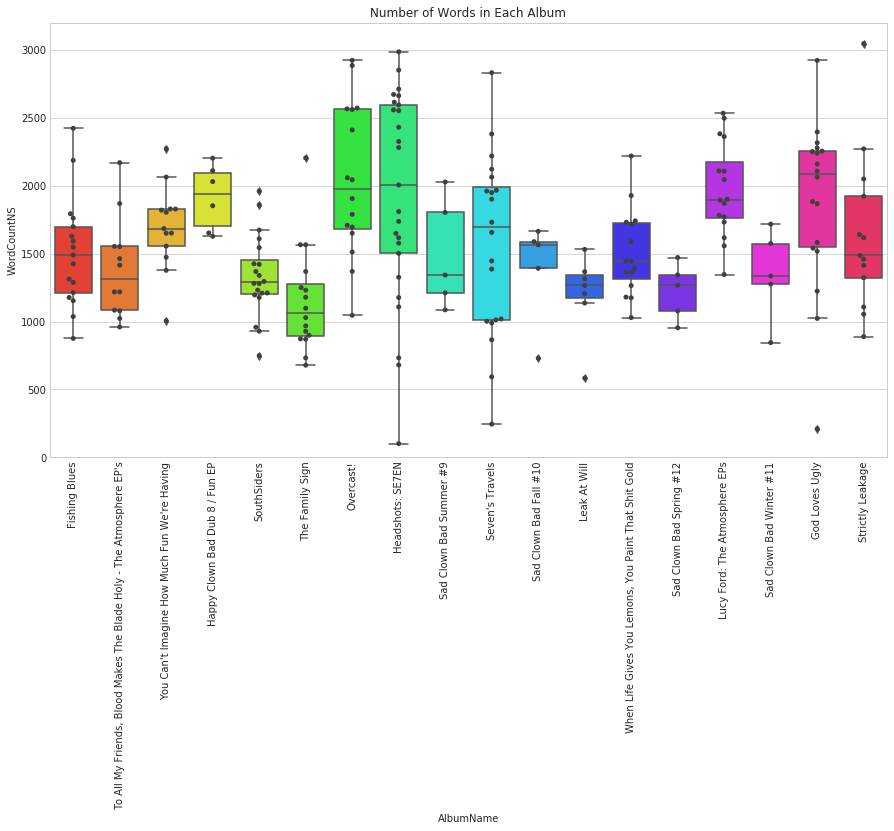

In [16]:
joindf.sort_values(by='WordCountNS', axis=0, ascending=False)
plt.figure(figsize=(15,8))
p = sns.boxplot(x='AlbumName', y='WordCountNS', data=joindf, palette=album_cdict)
p = sns.swarmplot(x='AlbumName', y='WordCountNS', data=joindf, color="0.25")
plt.xticks(rotation=90);
plt.ylim((0,3200));
plt.title('Number of Words in Each Album');

/home/jaylew/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jaylew/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


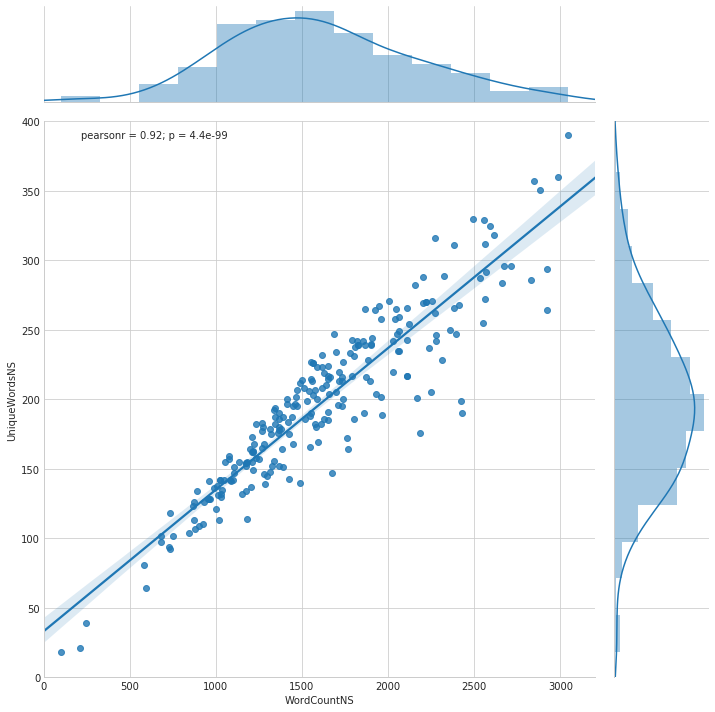

In [17]:
#Compare the relationship of unique words vs number of words. Looks quite linear.
wp = sns.jointplot(x='WordCountNS', y='UniqueWordsNS', data=joindf, size=10, kind='reg')
plt.ylim((0,400));
plt.xlim((0,3200));

(0, 500)

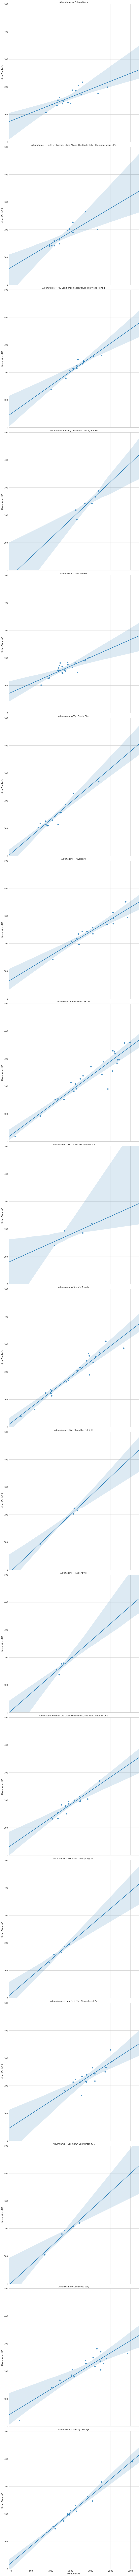

In [18]:
#What if we split it up by albums, giving each one a separate plot.
sns.lmplot(x='WordCountNS', y='UniqueWordsNS', data=joindf, row='AlbumName', size=10)
plt.ylim(0,500)

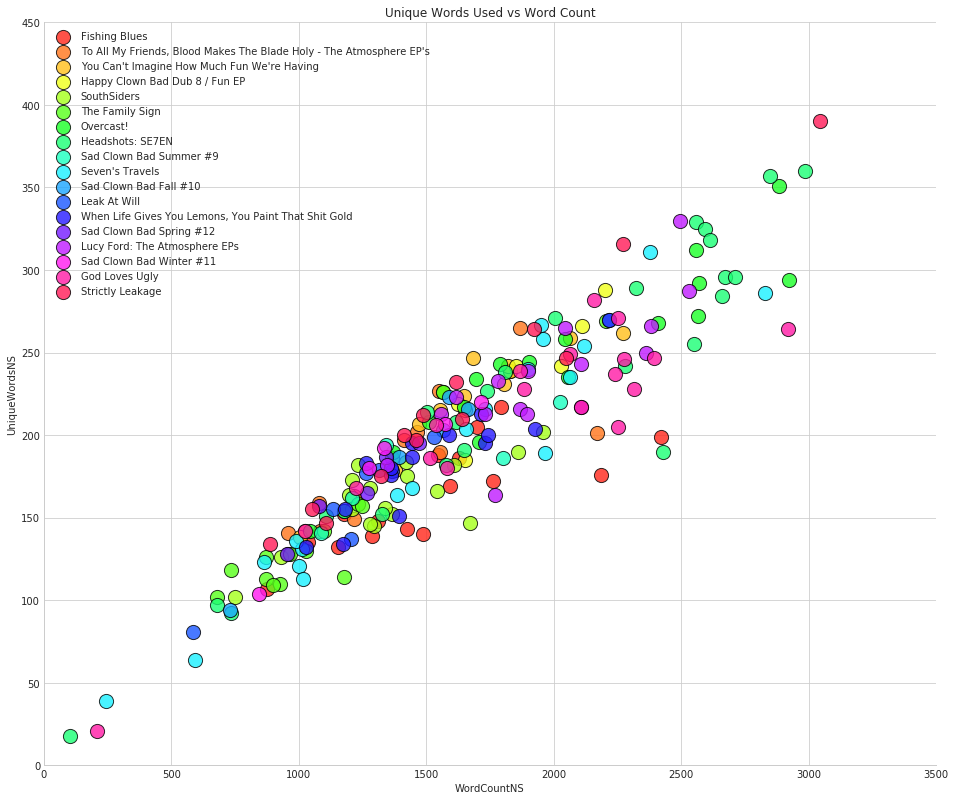

In [19]:
#Or more concise, use 'hue' to separate the albums.
sns.lmplot(x='WordCountNS', y='UniqueWordsNS', hue='AlbumName', data=joindf, palette=album_cdict, size=11, aspect=1.2, fit_reg=False, legend_out=False,
          scatter_kws={'s':200, 'edgecolor':'black'})
plt.legend(loc=2)
plt.title('Unique Words Used vs Word Count')
plt.ylim(0,450);
plt.xlim(0,3500);

In [ ]:
#Initial clustering attempts below. May need to do dimensionality reduction to make a more tangible clustering.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [84]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', max_df=0.3)

In [85]:
X = vectorizer.fit_transform(joindf['SongLyrics'])

/usr/lib/python3/dist-packages/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:
/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


In [86]:
km = KMeans(n_clusters=15, init='k-means++', n_init=1, verbose=1)

In [87]:
km.fit(X)

/usr/lib/python3/dist-packages/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:
/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


Initialization complete
Iteration  0, inertia 395.237
Iteration  1, inertia 207.722
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.083133e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [88]:
terms = vectorizer.get_feature_names()

In [89]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [91]:
for i in np.arange(0,15,1):
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind], end='')
    print('\n')

 yes loves shall mistake hope god ugly mention wed endures concern cares persistence dope break

 bad don kids day shoes pretend flicker imma notes eats old shes long bus dark

 kid baby number don really miss jai adjustments used barge constructed weve clap ass girl

 thing oh somebody sweet yeah hands yo wont said air anybody mind fly world breathe

 hey everybody forget bar drink turn chorus cheeba shot mightve walking wake fucking day lost

 days ll sunshine wide spawn father mind feelin awake day shine inside today teacher woah

 beautiful wounds lick graveyard taste money sound til mart jezabels quicksand flew woofers sandbox untied

 goes spawn mic heads attack panic women atmosphere comes flows use 30 doing mom thang

 away yeah party la uh people walkin horn round played huh stay upside plays everybody

 hes home coming shhh face homecoming bigger wont knew leave best old bam matter said

 run shes id believe respect bye maybe leave truth break everybody left cut lets ho

 wen